# Project Name: Financial Inclusion in Ghana: Using Machine Learning to bank the unbanked 
## Task-2 : Exploratory data analysis

### Details of EDA:
- Per Capita Income and Household Income Vs. Mobile Phone Penetration across regions of Ghana
- Distribution of Income groups across regions of Ghana
- Per Capita Income Vs. Bank Account Holder (%) across Ghana
- Gap Analysis to visualize the loan approval rate(%) and Loan applied by Ghanaian Households(%) with Household Income.

<i><b>Note: Per capita income and Household income has been calculated in terms of Ghanaian Cedis (GH₵)</b></i>
- <i>The data is taken completely from Ghana Living Standards Survey 7 which was published in June 2019 by Ghana Statistical Service</i>

## References: 
https://www.statsghana.gov.gh/gssmain/fileUpload/pressrelease/GLSS7%20MAIN%20REPORT_FINAL.pdf

In [1]:
### Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Reading the excel file
df = pd.read_excel("GLSS7.xlsx")
df.head(10)

,Regions,Use a mobile phone (% of regional pop.),Household Income (in GHS),Per Capita Income (in GHS),Quintile 1 (% of regional pop.),Quintile 2 (% of regional pop.),Quintile 3 (% of regional pop.),Quintile 4 (% of regional pop.),Quintile 5 (% of regional pop.),Bank Account Holders(Male %),Bank Account Holders(Female %),Bank Account Holders(Both Sexes %),Loan Applied (Male %),Loan Applied (Female %),Loan Applied(Both Sexes %),Percent of persons with loans granted,Percent of persons with loans refused
0,Upper West,51.0,12958,3064,56.6,20.6,9.0,8.0,5.7,14.6,13.0,13.8,5.8,11.9,7.3,95.4,1.8
1,Upper East,68.0,16130,3372,45.7,24.3,13.4,6.9,9.7,22.9,21.2,22.0,11.4,12.0,11.6,95.9,2.4
2,Eastern,73.4,21592,7718,6.0,17.9,23.4,23.8,28.9,30.1,23.6,26.7,7.0,8.4,7.5,93.5,5.3
3,Northern,55.8,22919,5748,41.1,22.7,14.6,11.1,10.6,13.5,9.2,11.3,8.7,8.7,8.7,95.2,4.3
4,Brong Ahafo,72.8,30710,12606,15.0,19.9,22.1,22.0,21.0,28.0,20.4,24.1,7.3,6.1,6.9,91.5,6.5
5,Western,71.7,30862,9058,11.4,20.9,21.2,24.2,22.2,28.7,22.6,25.6,9.6,10.4,9.9,92.9,1.3
6,Volta,74.3,31612,7394,22.9,24.7,21.0,17.8,13.6,23.5,19.0,21.2,7.1,13.3,9.4,90.4,6.8
7,Central,74.3,32564,12189,7.9,16.6,22.6,22.1,30.7,33.4,28.1,30.6,13.8,14.6,14.1,95.3,2.0
8,Greater Accra,86.6,64701,21592,1.1,3.6,9.7,26.9,58.6,45.6,40.2,42.8,3.8,6.3,4.7,89.3,7.9
9,Ashanti,79.2,72491,56664,5.1,11.9,18.2,26.4,38.5,36.2,27.7,31.7,2.7,3.9,3.1,91.1,8.0


In [3]:
## Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regions                                  10 non-null     object 
 1   Use a mobile phone (% of regional pop.)  10 non-null     float64
 2   Household Income (in GHS)                10 non-null     int64  
 3   Per Capita Income (in GHS)               10 non-null     int64  
 4   Quintile 1 (% of regional pop.)          10 non-null     float64
 5   Quintile 2 (% of regional pop.)          10 non-null     float64
 6   Quintile 3 (% of regional pop.)          10 non-null     float64
 7   Quintile 4 (% of regional pop.)          10 non-null     float64
 8   Quintile 5 (% of regional pop.)          10 non-null     float64
 9   Bank Account Holders(Male %)             10 non-null     float64
 10  Bank Account Holders(Female %)           10 non-null 

## <u> Per Capita Income and Household Income Vs. Mobile Phone Penetration across regions of Ghana</u>

In [4]:
## Creating a separate df for ease of visualization and better readability 

df1 = df[["Regions", "Household Income (in GHS)", "Per Capita Income (in GHS)", "Use a mobile phone (% of regional pop.)"]]
df1.head(10)

,Regions,Household Income (in GHS),Per Capita Income (in GHS),Use a mobile phone (% of regional pop.)
0,Upper West,12958,3064,51.0
1,Upper East,16130,3372,68.0
2,Eastern,21592,7718,73.4
3,Northern,22919,5748,55.8
4,Brong Ahafo,30710,12606,72.8
5,Western,30862,9058,71.7
6,Volta,31612,7394,74.3
7,Central,32564,12189,74.3
8,Greater Accra,64701,21592,86.6
9,Ashanti,72491,56664,79.2


### Visualizing the Household and Per Capita Income across regions of Ghana with Mobile phone users (%)

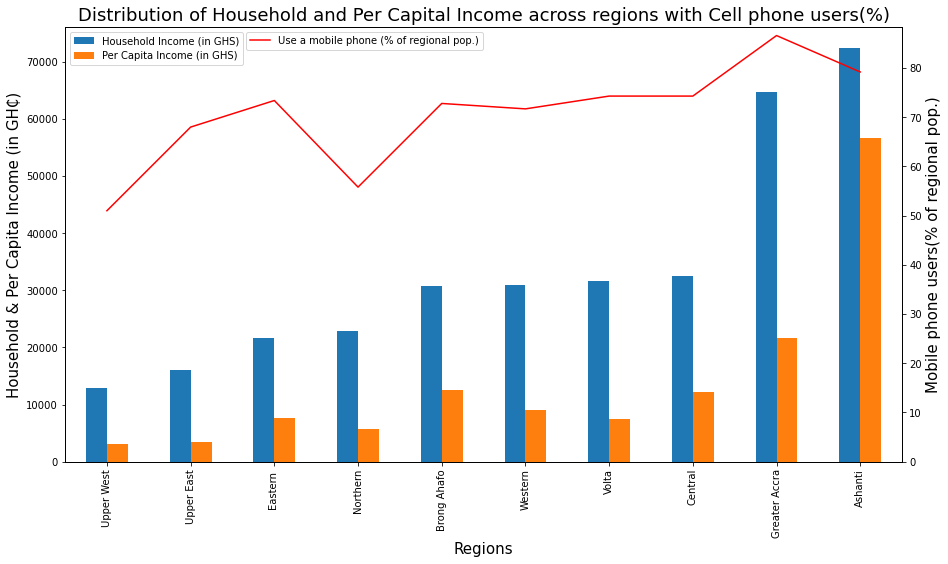

In [5]:
ax1 = df1.plot.bar(x='Regions', y=['Household Income (in GHS)','Per Capita Income (in GHS)'], figsize=(15,8))

ax2 = ax1.twinx()
ax2 = df1['Use a mobile phone (% of regional pop.)'].plot(secondary_y=True, color='red')
ax2.set_ylim(ymin=0)

ax1.set_ylabel('Household & Per Capita Income (in GH₵)', fontsize=15 )
ax2.set_ylabel('Mobile phone users(% of regional pop.)', fontsize=15)
ax1.set_xlabel('Regions', fontsize=15 )
ax2.legend(loc="upper left", bbox_to_anchor=(0.21,1))

ax1.set_title("Distribution of Household and Per Capital Income across regions with Cell phone users(%)", fontsize=18)

plt.show()

### Inferences:
- As the income rises, so does the users of mobile phones. The upward linear trend line can be visualized
- There is staggering difference between Greater Accra and Upper West region in terms of mobile phone penetration (difference of ~35%).

In [6]:
### Renaming the Quintiles columns with index starting from 4 to 8 into income brackets
df.rename(columns = {"Quintile 1 (% of regional pop.)": "Very poor (% of regional pop.)",
                     "Quintile 2 (% of regional pop.)": "Poor (% of regional pop.)", 
                     "Quintile 3 (% of regional pop.)": "Middle (% of regional pop.)" ,
                     "Quintile 4 (% of regional pop.)": "Upper Middle (% of regional pop.)", 
                     "Quintile 5 (% of regional pop.)": "Rich (% of regional pop.)"}, 
          inplace = True)

In [7]:
df.head()

,Regions,Use a mobile phone (% of regional pop.),Household Income (in GHS),Per Capita Income (in GHS),Very poor (% of regional pop.),Poor (% of regional pop.),Middle (% of regional pop.),Upper Middle (% of regional pop.),Rich (% of regional pop.),Bank Account Holders(Male %),Bank Account Holders(Female %),Bank Account Holders(Both Sexes %),Loan Applied (Male %),Loan Applied (Female %),Loan Applied(Both Sexes %),Percent of persons with loans granted,Percent of persons with loans refused
0,Upper West,51.0,12958,3064,56.6,20.6,9.0,8.0,5.7,14.6,13.0,13.8,5.8,11.9,7.3,95.4,1.8
1,Upper East,68.0,16130,3372,45.7,24.3,13.4,6.9,9.7,22.9,21.2,22.0,11.4,12.0,11.6,95.9,2.4
2,Eastern,73.4,21592,7718,6.0,17.9,23.4,23.8,28.9,30.1,23.6,26.7,7.0,8.4,7.5,93.5,5.3
3,Northern,55.8,22919,5748,41.1,22.7,14.6,11.1,10.6,13.5,9.2,11.3,8.7,8.7,8.7,95.2,4.3
4,Brong Ahafo,72.8,30710,12606,15.0,19.9,22.1,22.0,21.0,28.0,20.4,24.1,7.3,6.1,6.9,91.5,6.5


## <u>Economic Conditions across regions of Ghana</u>

In [8]:
## Creating a separate df for ease of visualization and better readability 
df2 = df[["Regions","Very poor (% of regional pop.)", 
          "Poor (% of regional pop.)", 
          "Middle (% of regional pop.)", 
          "Upper Middle (% of regional pop.)", 
          "Rich (% of regional pop.)"]]
df2.head(10)

,Regions,Very poor (% of regional pop.),Poor (% of regional pop.),Middle (% of regional pop.),Upper Middle (% of regional pop.),Rich (% of regional pop.)
0,Upper West,56.6,20.6,9.0,8.0,5.7
1,Upper East,45.7,24.3,13.4,6.9,9.7
2,Eastern,6.0,17.9,23.4,23.8,28.9
3,Northern,41.1,22.7,14.6,11.1,10.6
4,Brong Ahafo,15.0,19.9,22.1,22.0,21.0
5,Western,11.4,20.9,21.2,24.2,22.2
6,Volta,22.9,24.7,21.0,17.8,13.6
7,Central,7.9,16.6,22.6,22.1,30.7
8,Greater Accra,1.1,3.6,9.7,26.9,58.6
9,Ashanti,5.1,11.9,18.2,26.4,38.5


### Segregating the 10 regions of Ghana into two dataframe based on percentage of lowest income group

- The main purpose of segregating is to visualize the distribution in a more profound way

In [9]:
### Creating df with income group (very poor) % being less than 10%

high_income_regions = df2[df2["Very poor (% of regional pop.)"]<10.0]
high_income_regions.head(10)

,Regions,Very poor (% of regional pop.),Poor (% of regional pop.),Middle (% of regional pop.),Upper Middle (% of regional pop.),Rich (% of regional pop.)
2,Eastern,6.0,17.9,23.4,23.8,28.9
7,Central,7.9,16.6,22.6,22.1,30.7
8,Greater Accra,1.1,3.6,9.7,26.9,58.6
9,Ashanti,5.1,11.9,18.2,26.4,38.5


In [10]:
### Creating df with income group (very poor) % being greater than 10%

low_income_regions = df2[df2["Very poor (% of regional pop.)"]>10.0]
low_income_regions.head(10)

,Regions,Very poor (% of regional pop.),Poor (% of regional pop.),Middle (% of regional pop.),Upper Middle (% of regional pop.),Rich (% of regional pop.)
0,Upper West,56.6,20.6,9.0,8.0,5.7
1,Upper East,45.7,24.3,13.4,6.9,9.7
3,Northern,41.1,22.7,14.6,11.1,10.6
4,Brong Ahafo,15.0,19.9,22.1,22.0,21.0
5,Western,11.4,20.9,21.2,24.2,22.2
6,Volta,22.9,24.7,21.0,17.8,13.6


### Visualizing the high income regions with respect to its income group distribution

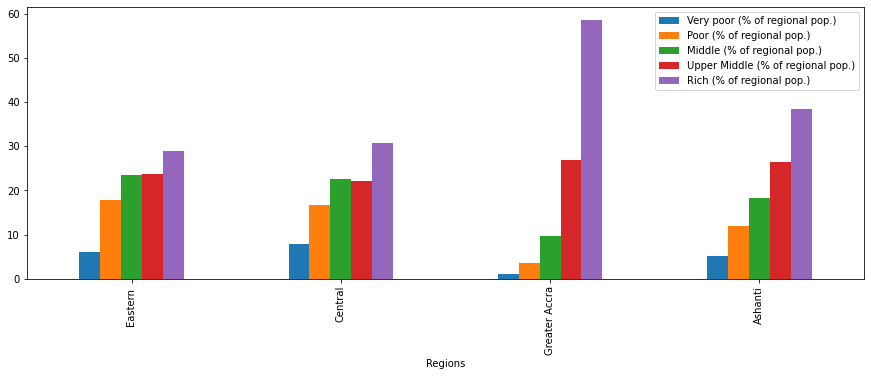

In [11]:
ax3 = high_income_regions.plot.bar(x='Regions', y=['Very poor (% of regional pop.)','Poor (% of regional pop.)', 'Middle (% of regional pop.)', 'Upper Middle (% of regional pop.)', 'Rich (% of regional pop.)'], figsize=(15,5))
plt.show()

### Inferences:
- The Greater Accra and Ashanti Region are among the high income regions of Ghana

### Visualizing the low income regions with respect to its income group distribution

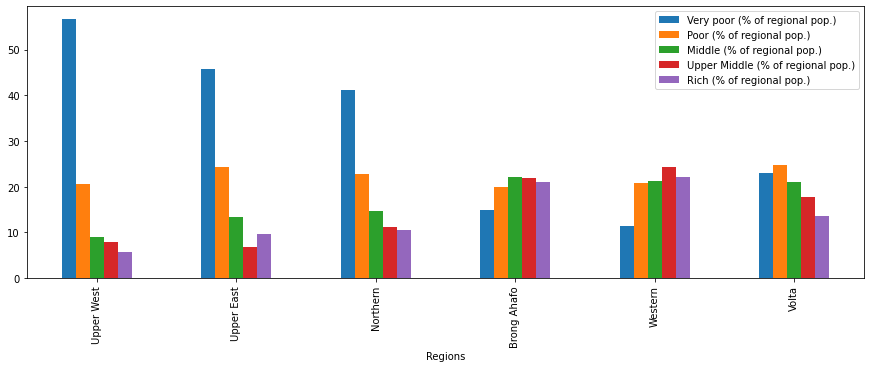

In [12]:
ax4 = low_income_regions.plot.bar(x='Regions', y=['Very poor (% of regional pop.)','Poor (% of regional pop.)', 'Middle (% of regional pop.)', 'Upper Middle (% of regional pop.)', 'Rich (% of regional pop.)'], figsize=(15,5))
plt.show()

### Inferences:
- Upper West, Upper East and the Northern Region are among the poorest of the Ghanaian regions.

In [13]:
## Creating a separate df for ease of visualization and better readability 

bank_acnt = df[["Regions", 
                "Per Capita Income (in GHS)", 
                "Bank Account Holders(Male %)", 
                "Bank Account Holders(Female %)", 
                "Bank Account Holders(Both Sexes %)"]]
bank_acnt.head(10)

,Regions,Per Capita Income (in GHS),Bank Account Holders(Male %),Bank Account Holders(Female %),Bank Account Holders(Both Sexes %)
0,Upper West,3064,14.6,13.0,13.8
1,Upper East,3372,22.9,21.2,22.0
2,Eastern,7718,30.1,23.6,26.7
3,Northern,5748,13.5,9.2,11.3
4,Brong Ahafo,12606,28.0,20.4,24.1
5,Western,9058,28.7,22.6,25.6
6,Volta,7394,23.5,19.0,21.2
7,Central,12189,33.4,28.1,30.6
8,Greater Accra,21592,45.6,40.2,42.8
9,Ashanti,56664,36.2,27.7,31.7


### Visualizing Bank Account Holders (in %) across regions of Ghana with Per Capital Income

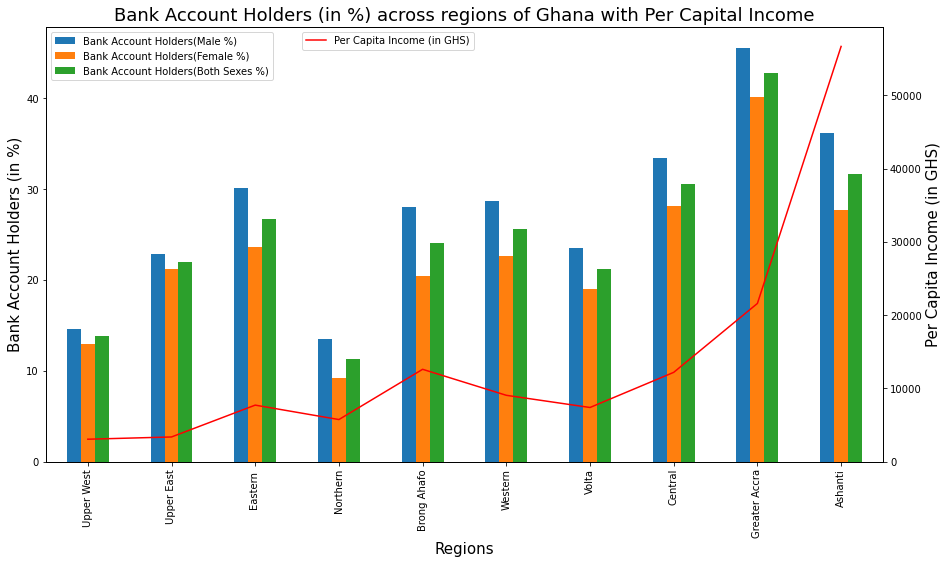

In [14]:
ax1 = bank_acnt.plot.bar(x='Regions', y=['Bank Account Holders(Male %)','Bank Account Holders(Female %)','Bank Account Holders(Both Sexes %)'], figsize=(15,8))

ax2 = ax1.twinx()
ax2 = bank_acnt['Per Capita Income (in GHS)'].plot(secondary_y=True, color='red')
ax2.set_ylim(ymin=0)

ax1.set_ylabel('Bank Account Holders (in %)', fontsize=15 )
ax2.set_ylabel('Per Capita Income (in GHS)', fontsize=15)
ax1.set_xlabel('Regions', fontsize=15 )
ax2.legend(loc="upper left", bbox_to_anchor=(0.3,1))

ax1.set_title("Bank Account Holders (in %) across regions of Ghana with Per Capital Income", fontsize=18)

plt.show()

### Inferences
- There is a staggering difference between Upper West and Greater Accra Region in terms of Bank Account Holders(%).
- An upward trend of Bank Account Holders(%) with rise in the Per capita Income can be seen easily.

In [15]:
### Renaming two columns for ease of understanding the df
df.rename(columns = {"Percent of persons with loans granted": "Loan approval rate(%)", 
                     "Percent of persons with loans refused": "Loan refusal rate(%)"}, inplace=True)
df.head(10)

,Regions,Use a mobile phone (% of regional pop.),Household Income (in GHS),Per Capita Income (in GHS),Very poor (% of regional pop.),Poor (% of regional pop.),Middle (% of regional pop.),Upper Middle (% of regional pop.),Rich (% of regional pop.),Bank Account Holders(Male %),Bank Account Holders(Female %),Bank Account Holders(Both Sexes %),Loan Applied (Male %),Loan Applied (Female %),Loan Applied(Both Sexes %),Loan approval rate(%),Loan refusal rate(%)
0,Upper West,51.0,12958,3064,56.6,20.6,9.0,8.0,5.7,14.6,13.0,13.8,5.8,11.9,7.3,95.4,1.8
1,Upper East,68.0,16130,3372,45.7,24.3,13.4,6.9,9.7,22.9,21.2,22.0,11.4,12.0,11.6,95.9,2.4
2,Eastern,73.4,21592,7718,6.0,17.9,23.4,23.8,28.9,30.1,23.6,26.7,7.0,8.4,7.5,93.5,5.3
3,Northern,55.8,22919,5748,41.1,22.7,14.6,11.1,10.6,13.5,9.2,11.3,8.7,8.7,8.7,95.2,4.3
4,Brong Ahafo,72.8,30710,12606,15.0,19.9,22.1,22.0,21.0,28.0,20.4,24.1,7.3,6.1,6.9,91.5,6.5
5,Western,71.7,30862,9058,11.4,20.9,21.2,24.2,22.2,28.7,22.6,25.6,9.6,10.4,9.9,92.9,1.3
6,Volta,74.3,31612,7394,22.9,24.7,21.0,17.8,13.6,23.5,19.0,21.2,7.1,13.3,9.4,90.4,6.8
7,Central,74.3,32564,12189,7.9,16.6,22.6,22.1,30.7,33.4,28.1,30.6,13.8,14.6,14.1,95.3,2.0
8,Greater Accra,86.6,64701,21592,1.1,3.6,9.7,26.9,58.6,45.6,40.2,42.8,3.8,6.3,4.7,89.3,7.9
9,Ashanti,79.2,72491,56664,5.1,11.9,18.2,26.4,38.5,36.2,27.7,31.7,2.7,3.9,3.1,91.1,8.0


## <u> Gap Analysis </u>

### Visualizing the Gap analysis between regional loan applied by both sexes and Loan Approval Rate (%) across regions in Ghana

In [16]:
fin_access = df[["Regions",
                  "Household Income (in GHS)",
                  'Bank Account Holders(Both Sexes %)',
                  "Loan Applied(Both Sexes %)", 
                  "Loan approval rate(%)", 
                  "Loan refusal rate(%)"]]
fin_access.head()

,Regions,Household Income (in GHS),Bank Account Holders(Both Sexes %),Loan Applied(Both Sexes %),Loan approval rate(%),Loan refusal rate(%)
0,Upper West,12958,13.8,7.3,95.4,1.8
1,Upper East,16130,22.0,11.6,95.9,2.4
2,Eastern,21592,26.7,7.5,93.5,5.3
3,Northern,22919,11.3,8.7,95.2,4.3
4,Brong Ahafo,30710,24.1,6.9,91.5,6.5


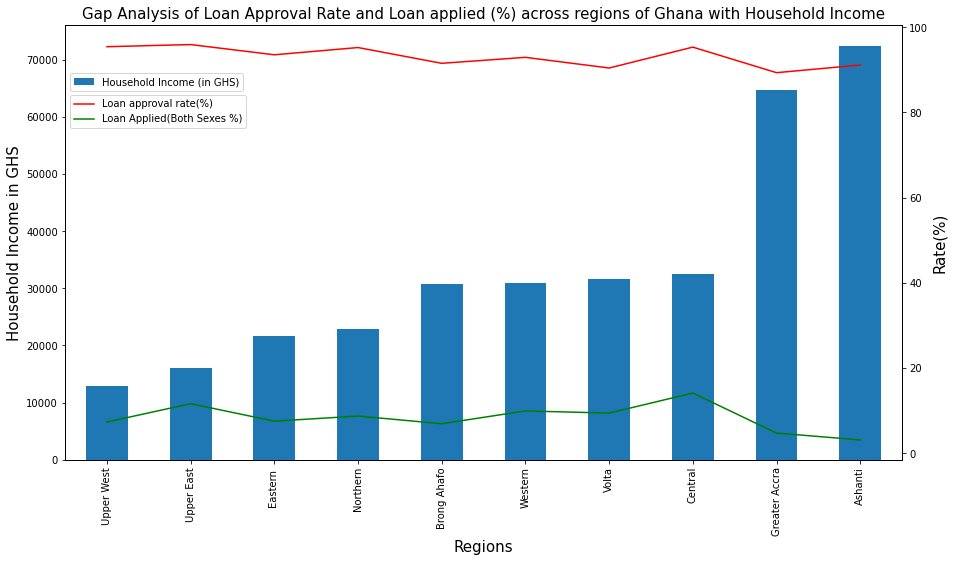

In [17]:
ax1 = fin_access.plot.bar(x='Regions', y=['Household Income (in GHS)'], figsize=(15,8))

ax2 = ax1.twinx()
ax2 = fin_access['Loan approval rate(%)'].plot(secondary_y=True, color='red')
ax3 = fin_access['Loan Applied(Both Sexes %)'].plot(secondary_y=True, color='green')
ax1.set_ylabel('Household Income in GHS', fontsize=15 )
ax2.set_ylabel('Rate(%)', fontsize=15)
ax1.set_xlabel('Regions', fontsize=15 )
ax2.legend(loc="upper left", bbox_to_anchor=(0,0.85))
ax1.legend(loc="upper left", bbox_to_anchor=(0,0.9))
ax1.set_title("Gap Analysis of Loan Approval Rate and Loan applied (%) across regions of Ghana with Household Income", fontsize=15)

plt.show()

### Inferences:
- It can be seen that even though the loan approval rate is above 90% for all the regions irrespective of the regional mean household income, less than 15% of the regional population has applied for any loan.
